# Model Wrapper Test

Use this notebook to test the ModelWrapper utility class to see if...
* train a model
* load the model from report and run predict and get metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff.csv'

# FEATURE_FILE = f'{DATASET_DIR}/atp_matches_1985-2019_features-diff-ohe.csv'

START_YEAR = 1998
END_YEAR = 2019

MODEL_TEMPLATE_NAME = f'{START_YEAR}-{END_YEAR}-test.pkl'

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100

import logging
logging.basicConfig(level=logging.INFO)

REPORT_FILE = "../reports/test_report.csv"

ModelWrapper.init(description = "test", 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR, 
                 model_file_format = MODEL_TEMPLATE_NAME,
                 report_file = REPORT_FILE)

Delete exiting report file if it already exists

In [2]:
%%bash -s "$REPORT_FILE"
if [ -f $1 ]; then
    echo "deleting $1"
    rm $1
fi

deleting ../reports/test_report.csv


In [3]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR)

INFO:util.jupyter_util:loading ../datasets/atp_matches_1985-2019_features-diff.csv


(59293, 17)


# KNN Training

In [4]:

# train our model

knn = mu.ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6109012412304371

              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7378
         Win       0.61      0.61      0.61      7446

    accuracy                           0.61     14824
   macro avg       0.61      0.61      0.61     14824
weighted avg       0.61      0.61      0.61     14824

      Loss   Win
Loss  4500  2878
Win   2890  4556


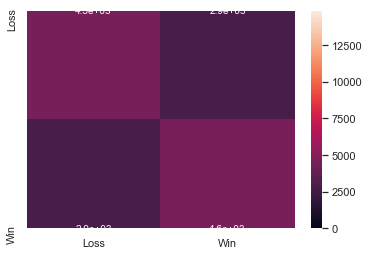

In [5]:
knn.analyze()

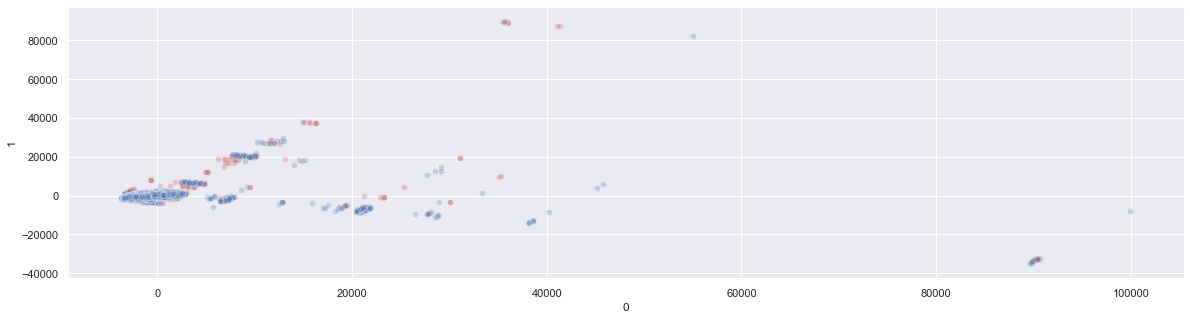

In [6]:
ju.plot_2d(X_test, y_predict_knn)

In [7]:
type(confusion_matrix(y_test, y_predict_knn))

numpy.ndarray

In [8]:
knn.save()

INFO:util.model_util:Saving report: ../reports/test_report.csv


In [9]:
report = pd.read_csv(ModelWrapper.report_file)
report

,model,description,data_file,start_year,accuracy,confusion_matrix,classification_report,model_file
0,KNeighborsClassifier,test,../datasets/atp_matches_1985-2019_features-dif...,1998,0.610901,"{""0"": {""0"": 4500, ""1"": 2890}, ""1"": {""0"": 2878,...","{""Loss"": {""precision"": 0.6089309878213802, ""re...",../models/kneighborsclassifier-1998-2019-test.pkl


In [10]:
report.columns

Index(['model', 'description', 'data_file', 'start_year', 'accuracy',
       'confusion_matrix', 'classification_report', 'model_file'],
      dtype='object')

In [11]:
knn_loaded = ModelWrapper.get_model_wrapper_from_report(report[report.model == "KNeighborsClassifier"])

INFO:util.model_util:<class 'pandas.core.frame.DataFrame'>
INFO:util.model_util:                  model description  \
0  KNeighborsClassifier        test   

                                           data_file  start_year  accuracy  \
0  ../datasets/atp_matches_1985-2019_features-dif...        1998  0.610901   

                                    confusion_matrix  \
0  {"0": {"0": 4500, "1": 2890}, "1": {"0": 2878,...   

                               classification_report  \
0  {"Loss": {"precision": 0.6089309878213802, "re...   

                                          model_file  
0  ../models/kneighborsclassifier-1998-2019-test.pkl  


In [12]:
pd.DataFrame(knn_loaded.cm)

,0,1
0,4500,2878
1,2890,4556


In [13]:
pd.DataFrame(knn_loaded.cr)

,Loss,Win,accuracy,macro avg,weighted avg
precision,0.608931,0.612860,0.610901,0.610895,0.610904
recall,0.609921,0.611872,0.610901,0.610897,0.610901
f1-score,0.609426,0.612366,0.610901,0.610896,0.610902
support,7378.000000,7446.000000,0.610901,14824.000000,14824.000000


In [14]:
knn_loaded.X_test = X_test
knn_loaded.predict()

array([1., 0., 1., ..., 0., 0., 1.])